# Project 9 - Partial Correlations and Directed Acyclic Graphs

In [1]:
import random
import numpy as np
import pandas as pd

length = 10000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5
# Creates a blank list
lst_dct = {col:[] for col in cols}

In [2]:
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, 0.5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1] + np.random.normal(mu, sigma))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 + np.random.normal(mu, sigma))
    lst_dct["Z"].append(lst_dct["P"][-1] * 2 + 1.5 * lst_dct["X"][-1] 
                        - lst_dct["Y"][-1] * 2 + np.random.normal(mu, sigma))
    
df = pd.DataFrame(lst_dct)
keys = cols
df

P          Q           X          Y           Z
0     24.929248  53.127950  156.482047 -45.597681  385.557695
1     26.857808  51.844959  150.015909 -57.125098  392.056993
2     23.806069  43.165442  122.982111 -46.544708  328.523294
3     25.948662  52.904925  154.365721 -42.144487  365.649805
4     20.086309  53.840919  157.786732 -50.601743  376.269253
...         ...        ...         ...        ...         ...
9995  25.057332  52.046976  153.938810 -53.190149  379.769981
9996  31.072113  55.237964  162.114702 -48.457935  399.037899
9997  22.509232  48.027059  150.693409 -50.298164  369.689439
9998  27.596678  45.846504  133.333660 -46.236811  347.258190
9999  26.020344  58.039850  174.169800 -63.482080  441.420619

[10000 rows x 5 columns]

<AxesSubplot:xlabel='Q', ylabel='Z'>

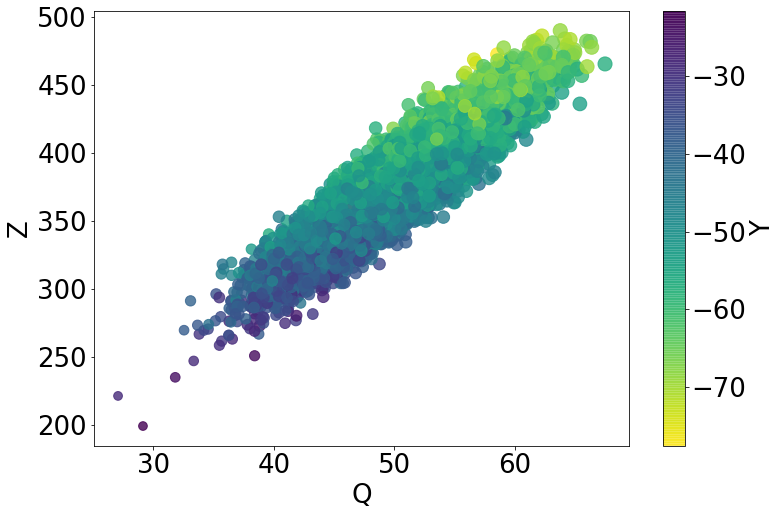

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12, 8))
df.plot.scatter(x = "Q", 
                y = "Z", 
                c = "Y", 
                s = "X", 
                cmap = "viridis_r", 
                alpha = 0.8, 
                ax = ax)

In [4]:
df.corr()

P         Q         X         Y         Z
P  1.000000  0.007542  0.007768  0.002508  0.146686
Q  0.007542  1.000000  0.948314 -0.703874  0.914062
X  0.007768  0.948314  1.000000 -0.666898  0.934067
Y  0.002508 -0.703874 -0.666898  1.000000 -0.843377
Z  0.146686  0.914062  0.934067 -0.843377  1.000000

## Partial Correlation

In [5]:
import statsmodels.api as sm
# Takes keys - y variable
# Creates a residuals dictionary
residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df[X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     2578.
Date:                Mon, 01 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:05:06   Log-Likelihood:                -19856.
No. Observations:               10000   AIC:                         3.972e+04
Df Residuals:                    9995   BIC:                         3.976e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q              0.0083      0.012      0.705      0.4

In [6]:
residuals

P         Q         X         Y         Z
0    -2.526105  1.815758 -5.495518  5.415994  9.854887
1     1.222781  1.213651 -1.218189 -1.461485 -1.075868
2    -1.388500  0.845043 -3.531481  0.699421  3.359997
3     0.951441  2.456817 -0.471648  1.343347 -1.956911
4    -1.970368  1.709413 -0.376548 -0.025364 -1.741604
...        ...       ...       ...       ...       ...
9995  1.997030  0.701436  2.854265 -3.281621 -7.702777
9996  3.797145  2.099453  0.324182  0.036233 -3.213369
9997 -0.684649 -2.158635  2.927840 -1.233082 -2.026552
9998  1.418341  0.730446 -1.099380 -0.238489 -0.421129
9999  0.288154  0.283900 -0.485421 -0.695603  0.937891

[10000 rows x 5 columns]

In [7]:
# Takes correlation of the residuals, takes absolute value less than one
# and multiplies these values by one. Fills null values with ones and 
# rounds to two decimals.
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

P     Q     X     Y     Z
P  1.00  0.01 -0.59  0.64  0.71
Q  0.01  1.00  0.50 -0.14 -0.01
X -0.59  0.50  1.00  0.75  0.83
Y  0.64 -0.14  0.75  1.00 -0.90
Z  0.71 -0.01  0.83 -0.90  1.00

In [8]:
# !pip install pingouin
# Has a pandas dataframe extension
import pingouin
df.pcorr().round(2)

P     Q     X     Y     Z
P  1.00  0.01 -0.59  0.64  0.71
Q  0.01  1.00  0.50 -0.14 -0.01
X -0.59  0.50  1.00  0.75  0.83
Y  0.64 -0.14  0.75  1.00 -0.90
Z  0.71 -0.01  0.83 -0.90  1.00

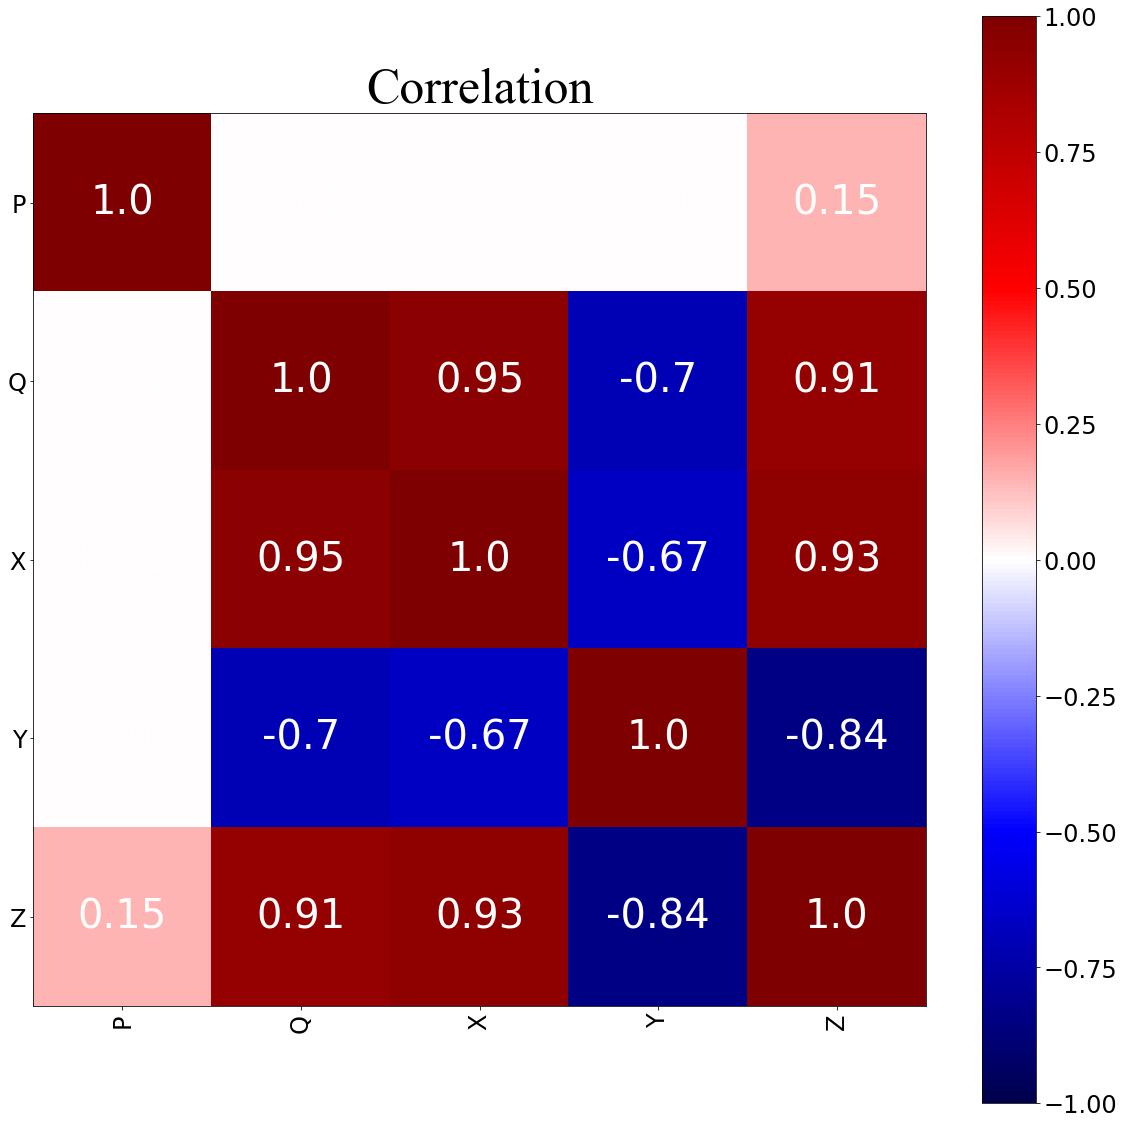

In [9]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(), 
                    save_fig = False, 
                    pp = None)

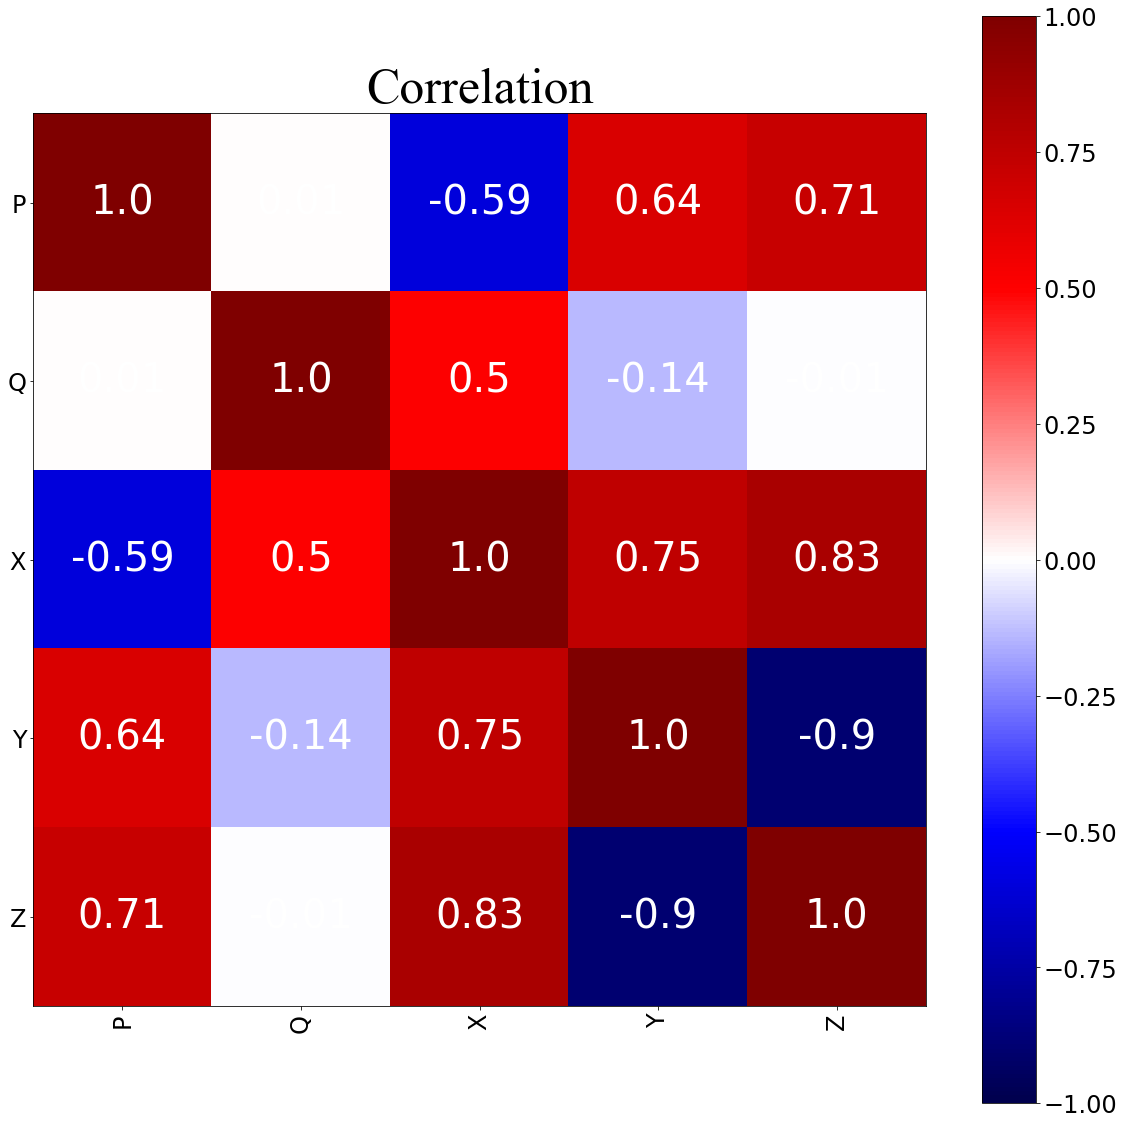

In [10]:
corr_matrix_heatmap(df.pcorr(),
                   save_fig = False,
                   pp = None)

In [11]:
pcorr_pvalues = {}

# y = name, Y = data
for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            # Regress one residual on the other, save the p value for the 
            # explanatory variable. This is the p value of the partial
            # correlation
            results = sm.OLS(Y, X).fit()
            pcorr_pvalues[y][x] = results.pvalues[x]
            print(results.summary())
        else:
            pcorr_pvalues[y][x] = np.NaN
            
pd.DataFrame(pcorr_pvalues).round(2)

                                 OLS Regression Results                                
Dep. Variable:                      P   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.4973
Date:                Mon, 01 Nov 2021   Prob (F-statistic):                       0.481
Time:                        18:05:08   Log-Likelihood:                         -19856.
No. Observations:               10000   AIC:                                  3.971e+04
Df Residuals:                    9999   BIC:                                  3.972e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

P     Q    X    Y     Z
P   NaN  0.48  0.0  0.0  0.00
Q  0.48   NaN  0.0  0.0  0.54
X  0.00  0.00  NaN  0.0  0.00
Y  0.00  0.00  0.0  NaN  0.00
Z  0.00  0.54  0.0  0.0   NaN

## Using Partial Correlations to Build a Causal Skeleton

In [12]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    undirected_graph[x] = [y for y in df.keys() if y != x]
        
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [13]:
import copy

# Removes the links from P because there are no connections for P besides Z
p_val = 0.01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, 
                                 undirected_graph, 
                                 x, 
                                 y, 
                                 controls_used):
        for c_var in control_vars:
            # Sets c_used every time use cycle through new control
            # Program will iterate through remaining controls
            # Until the statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                print(x, y, controls_used)
                test = df.partial_corr(x = x,
                                       y = y, 
                                       covar = c_used,
                                       method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)
                    # Recursive function that iterates through remaining variables
                    check_remaining_controls(remaining_controls,
                                             undirected_graph,
                                             x,
                                             y,
                                             c_used)
    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                test = df.partial_corr(x = x,
                                       y = y,
                                       covar = None,
                                       method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars,
                                             undirected_graph,
                                             x, 
                                             y,
                                             [])
    return undirected_graph

build_skeleton(df, undirected_graph)

P Z []
P Z ['Q']
P Z ['Q', 'X']
P Z ['Q']
P Z ['Q', 'Y']
P Z []
P Z ['X']
P Z ['X', 'Q']
P Z ['X']
P Z ['X', 'Y']
P Z []
P Z ['Y']
P Z ['Y', 'Q']
P Z ['Y']
P Z ['Y', 'X']
Q X []
Q X ['P']
Q X ['P', 'Y']
Q X ['P']
Q X ['P', 'Z']
Q X []
Q X ['Y']
Q X ['Y', 'P']
Q X ['Y']
Q X ['Y', 'Z']
Q X []
Q X ['Z']
Q X ['Z', 'P']
Q X ['Z']
Q X ['Z', 'Y']
Q Y []
Q Y ['P']
Q Y ['P', 'X']
Q Y ['P']
Q Y ['P', 'Z']
Q Y []
Q Y ['X']
Q Y ['X', 'P']
Q Y ['X']
Q Y ['X', 'Z']
Q Y []
Q Y ['Z']
Q Y ['Z', 'P']
Q Y ['Z']
Q Y ['Z', 'X']
Q Z []
Q Z ['P']
Q Z ['P', 'X']
X Q []
X Q ['P']
X Q ['P', 'Y']
X Q ['P']
X Q ['P', 'Z']
X Q []
X Q ['Y']
X Q ['Y', 'P']
X Q ['Y']
X Q ['Y', 'Z']
X Q []
X Q ['Z']
X Q ['Z', 'P']
X Q ['Z']
X Q ['Z', 'Y']
X Y []
X Y ['P']
X Z []
X Z ['P']
X Z ['P', 'Q']
X Z ['P']
X Z ['P', 'Y']
X Z []
X Z ['Q']
X Z ['Q', 'P']
X Z ['Q']
X Z ['Q', 'Y']
X Z []
X Z ['Y']
X Z ['Y', 'P']
X Z ['Y']
X Z ['Y', 'Q']
Y Q []
Y Q ['P']
Y Q ['P', 'X']
Y Q ['P']
Y Q ['P', 'Z']
Y Q []
Y Q ['X']
Y Q ['X', 'P']
Y Q ['X

{'P': ['Z'],
 'Q': ['X', 'Y'],
 'X': ['Q', 'Z'],
 'Y': ['Q', 'Z'],
 'Z': ['P', 'X', 'Y']}

## Graphing the Skeleton

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, 
              df, 
              title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph = nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        # Refers to the first key that there is a correlation with
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
                
    print(edges)
    print(edge_labels)
    
    graph.add_edges_from(edges)

graph_DAG(undirected_graph, df)

[('P', 'Z'), ('Q', 'X'), ('Q', 'Y'), ('X', 'Z'), ('Y', 'Z')]
{('P', 'Z'): '0.71', ('Q', 'X'): '0.5', ('Q', 'Y'): '-0.14', ('X', 'Z'): '0.83', ('Y', 'Z'): '-0.9'}
